In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('default')
%matplotlib inline

bank_df = pd.read_csv('data/churn.csv')

bank_df['clinet_status'] = bank_df['Exited'].replace({0:'Лояльные', 1:'Ушедшие'})
exit_stat = bank_df['clinet_status'].value_counts() 



client_true = bank_df[bank_df['Exited'] == 0]
client_true.drop_duplicates()

client_false = bank_df[bank_df['Exited'] == 1]
client_false.drop_duplicates()

bank_df['IsActiveMember'] = bank_df['IsActiveMember'].map(lambda x: 'неактивный' if x == 0 else 'активный')

bank_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,clinet_status
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,активный,101348.88,1,Ушедшие
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,активный,112542.58,0,Лояльные
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,неактивный,113931.57,1,Ушедшие
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,неактивный,93826.63,0,Лояльные
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,активный,79084.10,0,Лояльные
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,неактивный,96270.64,0,Лояльные
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,активный,101699.77,0,Лояльные
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,активный,42085.58,1,Ушедшие
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,неактивный,92888.52,1,Ушедшие


Text(0.5, 1.0, 'График распределения лояльных и ушедших клиентов')

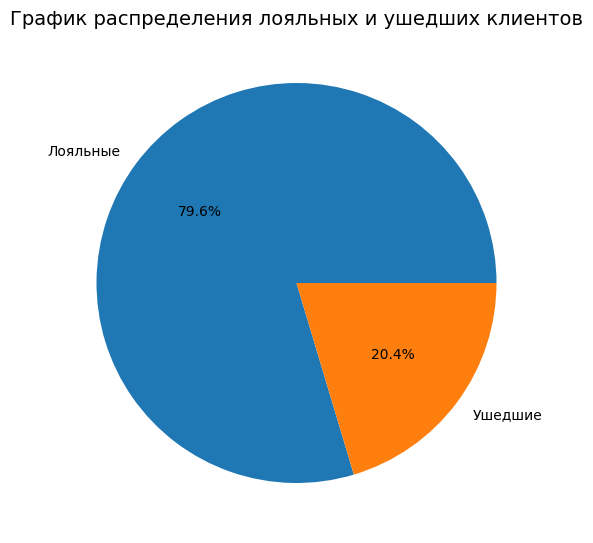

In [ ]:

fig = plt.figure(figsize=(5, 5))
exit_circ = fig.add_axes([0, 0, 1, 1])

exit_circ.pie(
    exit_stat,
    labels=exit_stat.index,
    autopct='%.1f%%'    
);

exit_circ.set_title('График распределения лояльных и ушедших клиентов', fontsize=14)

# Из показанного графика видно, что 79.6% клиентов банка остались ему лоялны, в то время как 20.4% приняли решение отказаться от его услуг

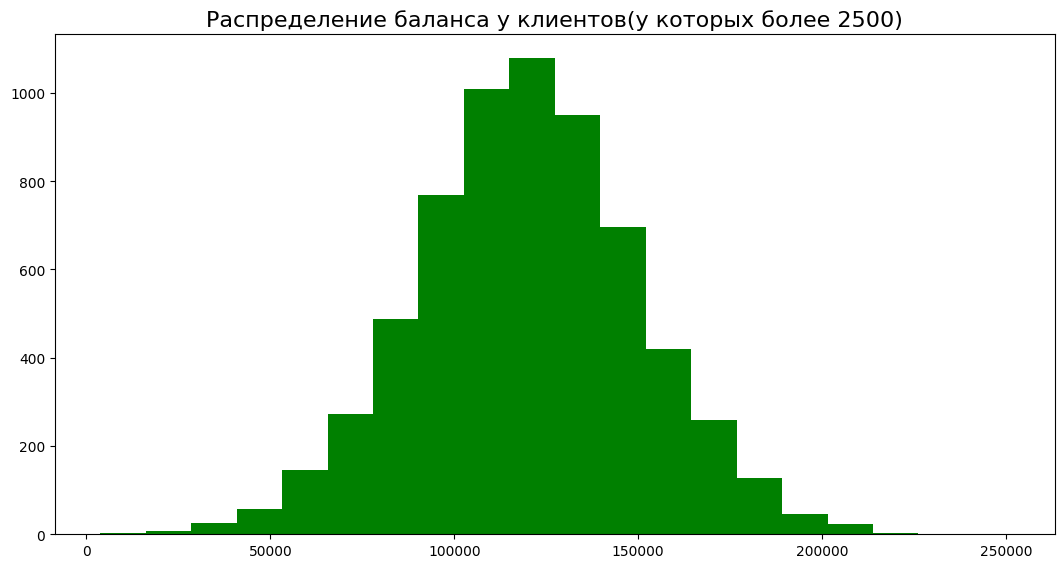

In [ ]:
client_count = bank_df[bank_df['Balance'] > 2500]

fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])

axes.hist(
    x=client_count['Balance'],
    color='green',
    label='Баланс',
    bins=20
);
axes.set_title('Распределение баланса у клиентов(у которых более 2500)', fontsize=16);

#Исходя из графика, можно сделать вывод, что баланс большинства клиентов варьируется между 100.000 и 150.000

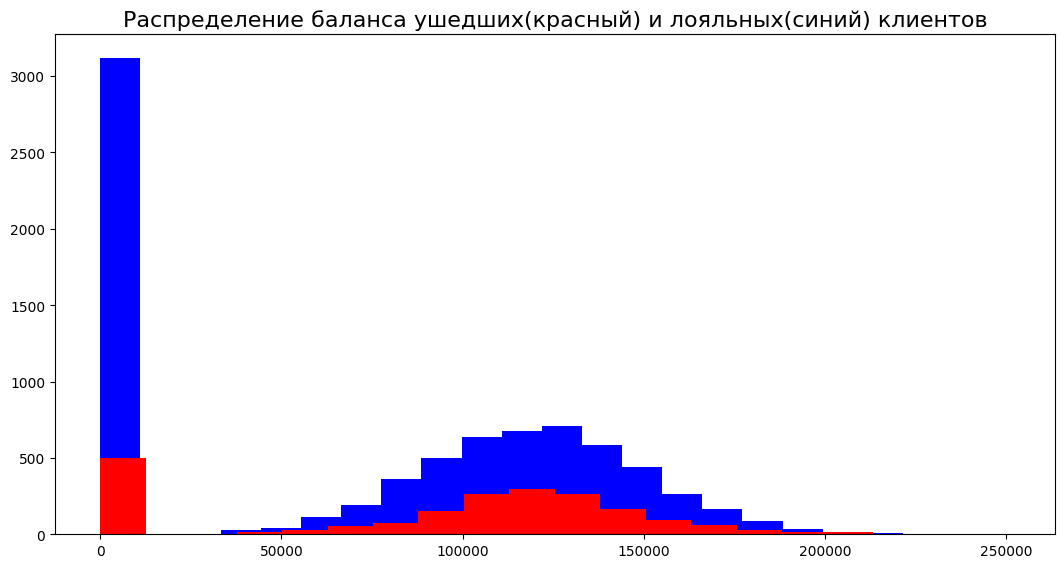

In [ ]:
fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])

axes.hist(
    x=client_true['Balance'], 
    color='blue',
    bins=20
);

axes.hist(
    x=client_false['Balance'],
    color='red',
    bins=20
);

axes.set_title('Распределение баланса ушедших(красный) и лояльных(синий) клиентов', fontsize=16);

#График показывает, что баланс ушедших клиентов равняется 0, что могло послужить причиной прекращения пользования

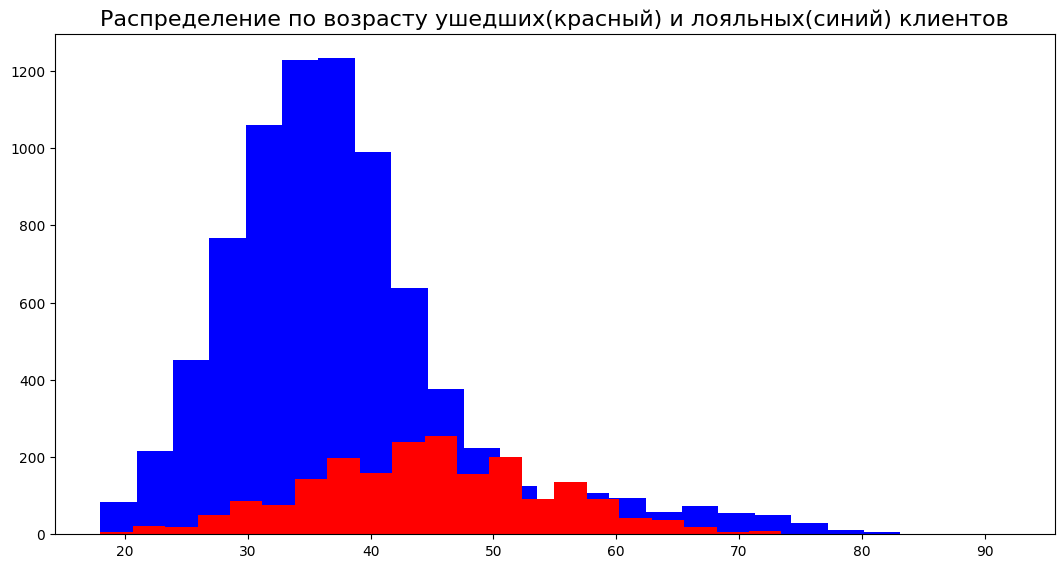

In [ ]:
clients_age = bank_df['Age']

fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])

axes.hist(
    x=client_true['Age'],
    color='blue',
    bins=25
);

axes.hist(
    x=client_false['Age'],
    color='red',
    bins=25
);

axes.set_title('Распределение по возрасту ушедших(красный) и лояльных(синий) клиентов', fontsize=16);

#Банку стоит обратить внимание на возрастную группу от 40 до 50 лет, поскольку именно эта группа склонна к уходу от банка

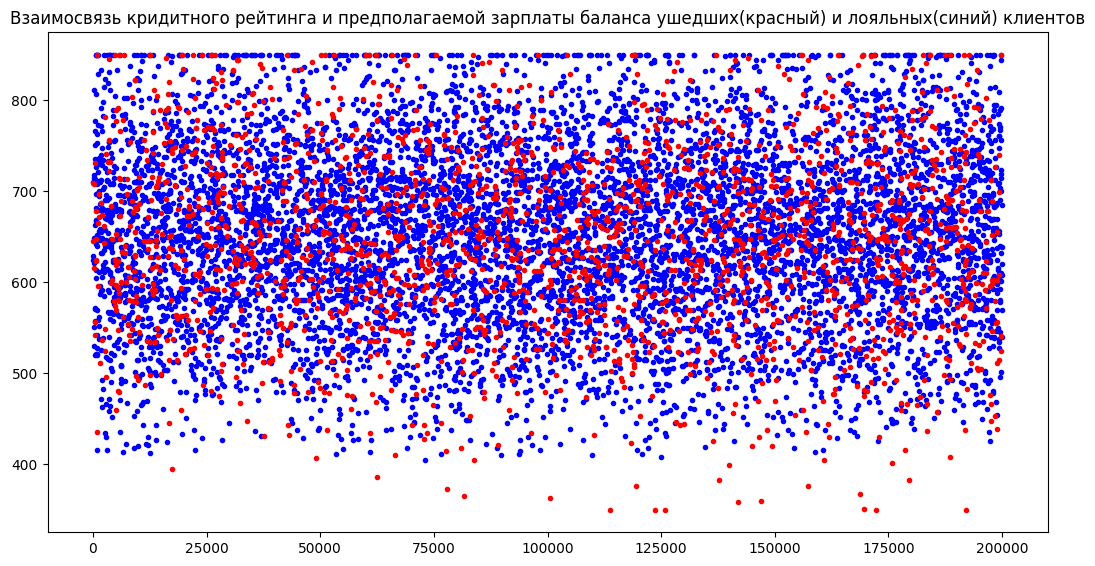

In [ ]:
fig = plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])

axes.scatter(
    x=client_true['EstimatedSalary'],
    y=client_true['CreditScore'],
    marker='.',
    c='blue'
);

axes.scatter(
    x=client_false['EstimatedSalary'],
    y=client_false['CreditScore'],
    marker='.',
    c='red'
);

axes.set_title('Взаимосвязь кридитного рейтинга и предполагаемой зарплаты баланса ушедших(красный) и лояльных(синий) клиентов');

#У части ушедших клиентов был низкий кридитный рейтинг, что могло послужить причиной ухода, в то время как высокий кредитный рейтинг приемущественно
#занимают лояльные клиенты. Но, тем не менее, большинство как ушедших, так и лояльных клиентов имеют средний кредитный рейтинг, вне зависимости от 
#предполагаемой зарплаты

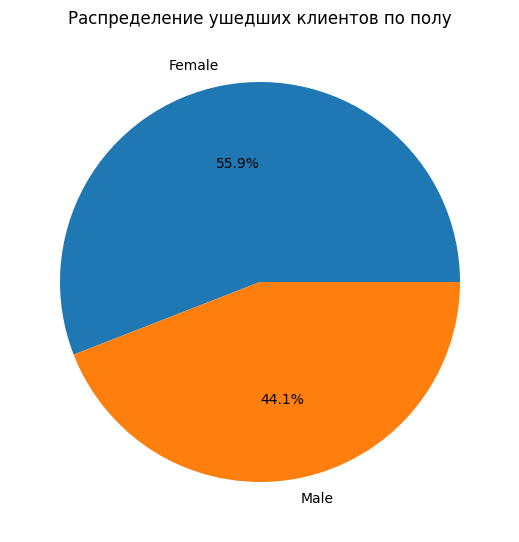

In [ ]:
client_gender = client_false['Gender'].value_counts()

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])

axes.pie(
    client_gender,
    labels=client_gender.index,
    autopct='%.1f%%'    
);

axes.set_title('Распределение ушедших клиентов по полу');

#Исходя из данных на графике, можно сделать вывод, что в 55.9% случаев от услуг банка отказывыаются женщины

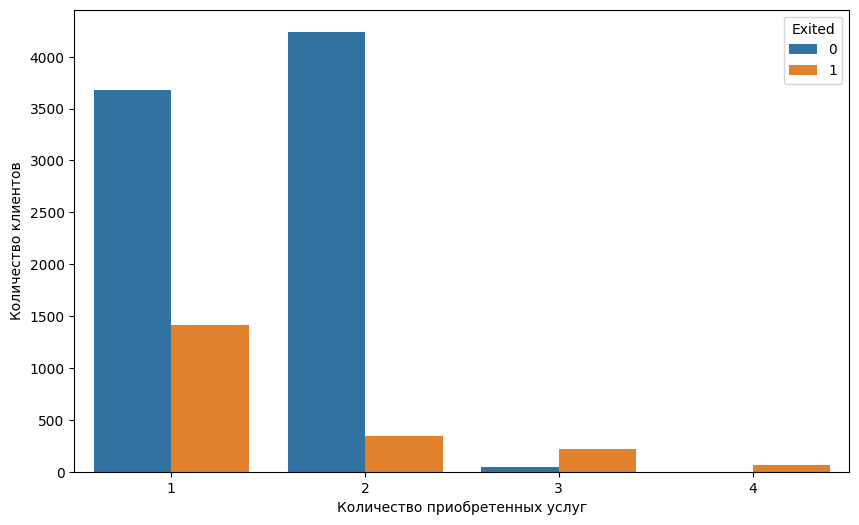

In [ ]:
service_df = bank_df.groupby(['NumOfProducts', 'Exited']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='NumOfProducts', y='Count', hue='Exited', data=service_df)

plt.xlabel('Количество приобретенных услуг')
plt.ylabel('Количество клиентов')
plt.show()

axes.set_title('Услуг банка купленно ушедшими(красный) и лояльными(синий) клиентами');

#Ушедшие клиенты меньше приобретали услуги банка, нежели лояльные клиенты

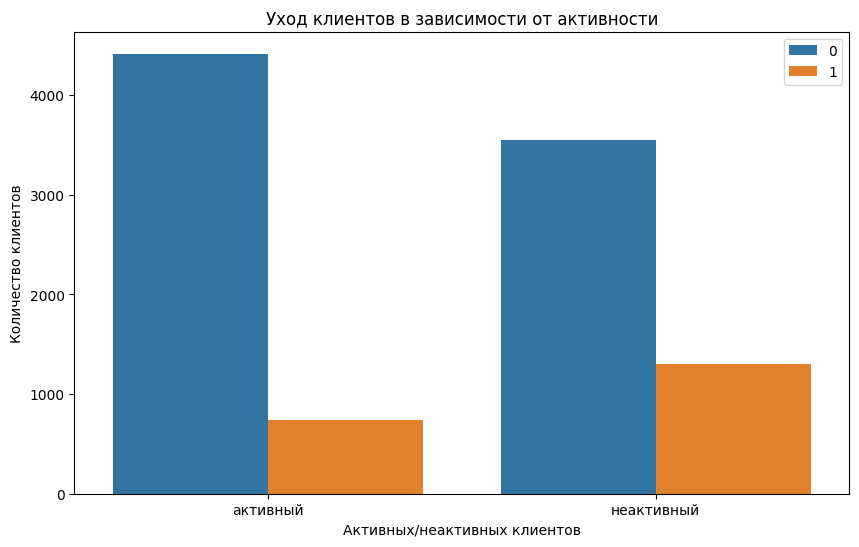

In [ ]:
active_data = bank_df.groupby(['IsActiveMember', 'Exited']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(x='IsActiveMember', y='Count', hue='Exited', data=active_data)
plt.title('Уход клиентов в зависимости от активности')
plt.xlabel('Активных/неактивных клиентов')
plt.ylabel('Количество клиентов')
plt.legend()
plt.show()

#Сравнительный график показывает, что неактивные клиенты уходят чаще, чем активные. Возможно, чтобы уменьшить отток неактивных клиентов, банку стоит
#предлогать пассивные вклады и уменьшение стоимости обслуживания(если имеется)

In [ ]:
country_df = bank_df.groupby(['Geography'])['Exited'].mean().reset_index()

fig = px.choropleth(
    data_frame=country_df, 
    locations="Geography", 
    locationmode = "country names", 
    color="Exited", 
    title='Распределение ушедших клиентов на карте мира', 
    width=800,
    height=500,
    color_continuous_scale='Reds'
)

fig.show()

#Больше всего клиентов уходит в Германии. Возможно, это связано с высокой ставкой, экономическим кризисом или простой ненадобностью пользоваться 
#услугами банка.

,Geography,Exited
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [ ]:
bank_df['CreditScoreCat'] = bank_df['CreditScore'].apply(get_credit_score_cat)

pivot = bank_df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
    )

fig = px.imshow(pivot,
    color_continuous_scale='reds',
    labels=dict(
        x='Количество лет, в течение которых клиент пользуется услугами банка',
        y='Категории кредитного рейтинга',
        color='Exited'
        )
    )

fig.update_xaxes(tickmode='linear')
fig.update_traces(texttemplate='%{z:.2f}')

fig.show()

#Чаще уходят клиенты с низким кридитным рейтингом и с небольшим опытом пользования услугами банка